In [2]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.filters.hp_filter import hpfilter

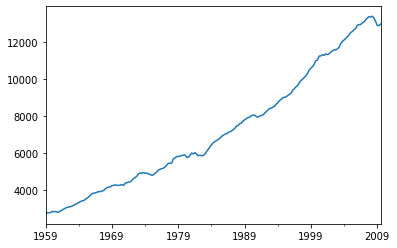

In [32]:
df=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\starbucks.csv',index_col='Date',parse_dates=True)
df1=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\macrodata.csv',index_col=0,parse_dates=True)
df1['realgdp'].plot()

In [18]:
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
Close     1006 non-null float64
Volume    1006 non-null int64
dtypes: float64(1), int64(1)
memory usage: 23.6 KB
None


,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


##### resample(downsample) with mean of 'year end '

In [15]:

df.resample(rule='A').mean() #year end frequency

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [17]:
#builtin resampling finction
def first_day(entry):
    if len(entry):
        return entry[0]
    
    
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [19]:
df.head(5)

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


#### moving average plot using rolling of window size 35

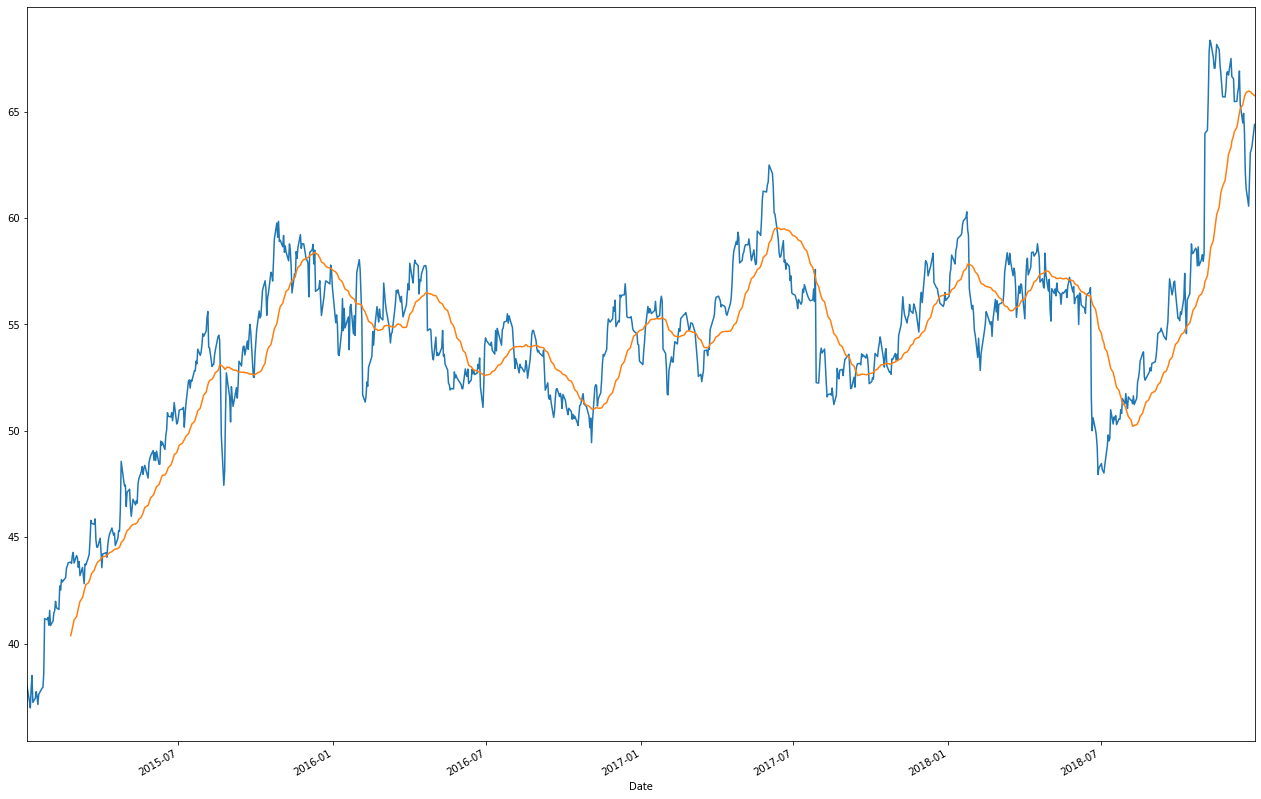

In [29]:

df['Close'].plot(figsize=(22,15))
df.rolling(window=35).mean()['Close'].plot()

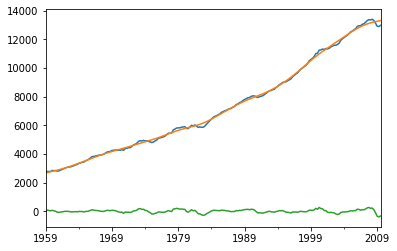

In [41]:
# spliting time series with trend and seasonality
cycle, trend = hpfilter(df1.realgdp, 1600)
df1["cycle"] = cycle
df1["trend"] = trend
df1['realgdp'].plot()
df1["trend"].plot()
df1["cycle"].plot()


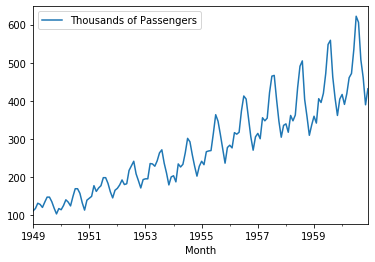

In [45]:
df=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\airline_passengers.csv',index_col='Month',parse_dates=True)
df=df.dropna()
df.plot()

#### decompose TS with trend seasional and residual

In [46]:

from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df['Thousands of Passengers'],model='multiplicative')


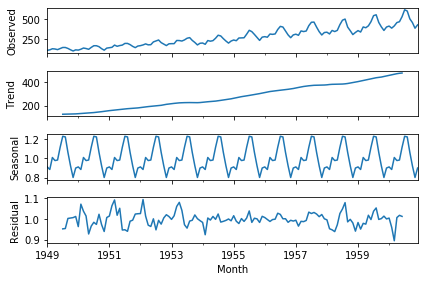

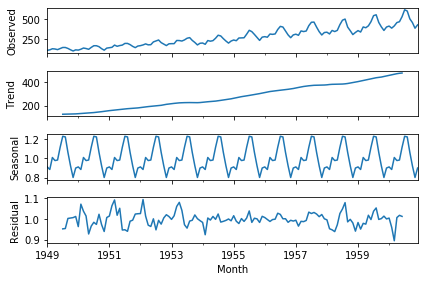

In [51]:
result.plot()

In [62]:
#EWMA
df=df.dropna()
df['6 month SMA']=df['Thousands of Passengers'].rolling(window=6).mean()
df['12 month SMA']=df['Thousands of Passengers'].rolling(window=12).mean()
#df['6 month SMA']=df['Thousands of Passengers'].rolling(window=6)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


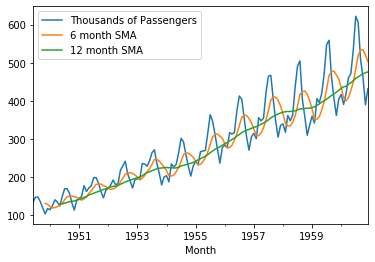

In [63]:
df.plot()

#### improve simple moving average by exponential moving average to find trend

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


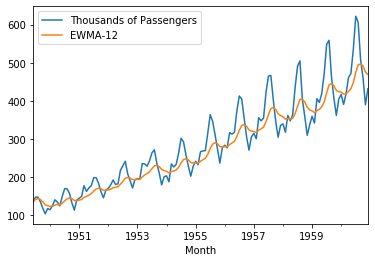

In [64]:

#props['mean']=props['mean']*(1-forg_fact) + forg_fact*data
df['EWMA-12']=df['Thousands of Passengers'].ewm(span=12).mean()
df[['Thousands of Passengers','EWMA-12']].plot()

In [65]:
ewm?

Object `ewm` not found.


In [67]:
#ewma has only one hyper-parameter alpha. to make double triple exponential smothing holt-winters method
# it consider level, trend and seasionality(alpha, beta, gama)



In [69]:
df.tail()

,Thousands of Passengers,6 month SMA,12 month SMA,EWMA-12
Month,,,,
1960-08-01,606,519.166667,463.333333,494.898620
1960-09-01,508,534.000000,467.083333,496.914217
1960-10-01,461,534.000000,471.583333,491.388952
1960-11-01,390,520.333333,473.916667,475.790652
1960-12-01,432,503.166667,476.166667,469.053629


#### create model with ExponentialSmoothing

In [88]:

train_data=df.iloc[:109]
test_data=df.iloc[108:]
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model=ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [98]:
test_predictions=model.forecast(31)  #forcast for 31 months

In [99]:
test_predictions

1958-07-01    474.998953
1958-08-01    467.103581
1958-09-01    399.511704
1958-10-01    341.331987
1958-11-01    298.918441
1958-12-01    332.606853
1959-01-01    340.732046
1959-02-01    324.432383
1959-03-01    378.026371
1959-04-01    371.841056
1959-05-01    389.937686
1959-06-01    463.957953
1959-07-01    508.745100
1959-08-01    500.288803
1959-09-01    427.894883
1959-10-01    365.581807
1959-11-01    320.155005
1959-12-01    356.236799
1960-01-01    364.939244
1960-02-01    347.481577
1960-03-01    404.883132
1960-04-01    398.258383
1960-05-01    417.640683
1960-06-01    496.919695
1960-07-01    544.888731
1960-08-01    535.831659
1960-09-01    458.294537
1960-10-01    391.554449
1960-11-01    342.900313
1960-12-01    381.545528
1961-01-01    390.866235
Freq: MS, dtype: float64

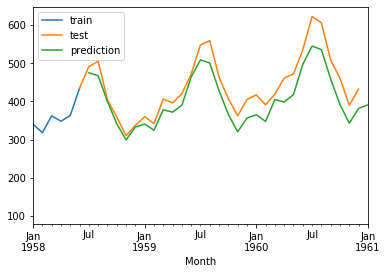

In [100]:
train_data['Thousands of Passengers'].plot(legend=True,label='train')
test_data['Thousands of Passengers'].plot(legend=True,label='test')
test_predictions.plot(legend=True,label='prediction',xlim=['1958-01-01','1961-01-01'])

In [97]:
test_data.shape

(31, 4)

In [102]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_absolute_error(test_data['Thousands of Passengers'],test_predictions)
mean_squared_error(test_data['Thousands of Passengers'],test_predictions)
model=ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
pred=model.forecast(36)

4293.942808075529

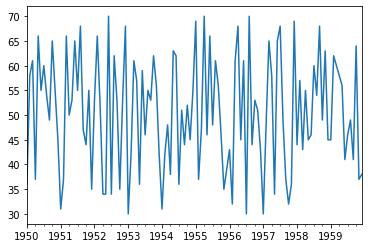

In [104]:
#forcast 2
df1=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\samples.csv',index_col=0,parse_dates=True)
df1['a'].plot() # stationary

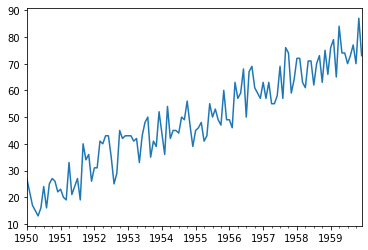

In [105]:
df1['b'].plot() #non stationary data

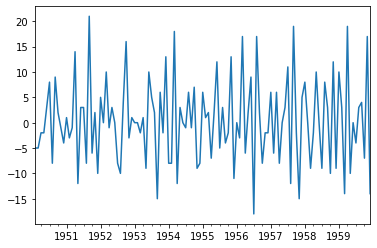

In [109]:
# Make TS stationary with differencing
from statsmodels.tsa.statespace.tools import diff
#df['b']-df['b'].shift(1) # 
diff(df1['b'],k_diff=1).plot()  # first order difference, 2nd order diference is done on result form first order difference

#### ACF can be of different degree. In ACF its corelation between tth observation and t-1 observation. 
#### In PACF we find corelation of tth residuals of observations with t-1 observation
#### a 95% Confidence interval is drawn . anything outside this box refer as very likely a corelation and not a statistical fluke
#### ACF can be used for MA and PACF can be used for AR process

## What is PACF : 
#### AR model is just a regression with variables as previous values of time i.e. y at t-1,t-2,t-3,...etc now to understand whether t-2 is corelated with t. if corelated then we should take it else not. But maybe t-2 is also corelated with t-1 ? in that case: we find corr betweent variable a)amount of variance in t that is not explained by variance in t-1 and b)amount of variance in t-1 that is not explained by variance in t-2. This corelation is called PACF of ti and (t-2)i. In general PACF of t10 with a lag of 5 of itself is a corr between the variables a) amount of variance in t10 which is not explained by variance of t9,t8,t7,t6  and b) amount of variance in t5 which is not explained by variance of t9,t8,t7,t6

#### To calculate this a) we do 2 step. 1) fit a linear model with y=t10 and x=t9,8,7,6. Conceptually this model will explain us the variance of t10 as a function of t9,8,7,6. But as its not 'the best' model there will be some residuals. 2) in next step we calculate residuals of observed and predicted values of t10. This value is calculate for each values of t10 across the time series. b) similarly we do this for t5 with t9,8,7,6. at last we apply pearson corelation coefficient of those 2 residuals





In [112]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
df1=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq='MS'
df2=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq='D'

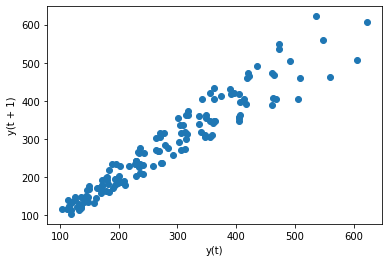

In [115]:
# CHeck ACF with lag_plot
from pandas.plotting import lag_plot
lag_plot(df1['Thousands of Passengers']) # good ACF

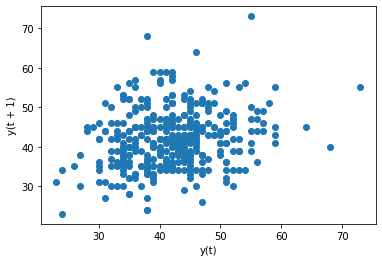

In [116]:
lag_plot(df2['Births']) # not much ACF

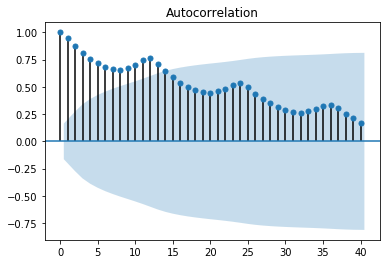

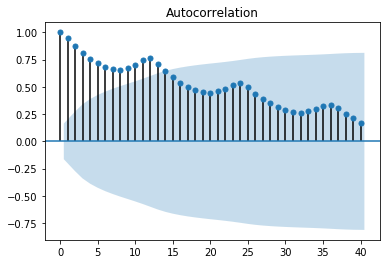

In [118]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df1,lags=40) # look ACF due to seasionality

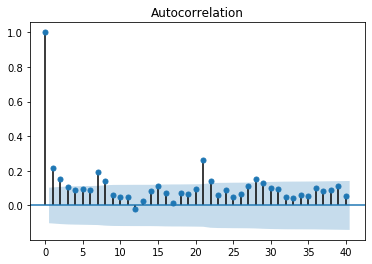

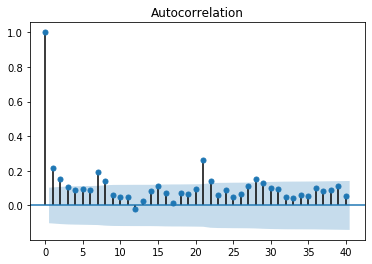

In [120]:
plot_acf(df2,lags=40)

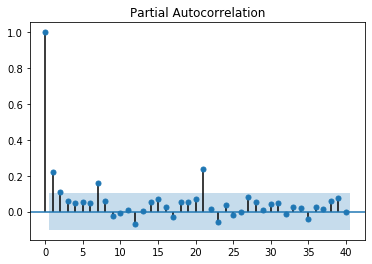

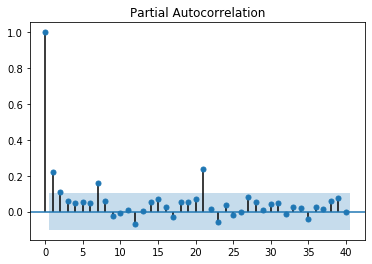

In [121]:
plot_pacf(df2,lags=40)

#### Use AR model
#### We can get some idea of hyperparameter of ARIMA from ACF and PACF but its easy to do grid search by trying different p,q,d

In [123]:
# ARIMA: I is got from differencing
# stationarity check can be done by dickey-fuller test
# AR model: y(t)=c+a1y(t-1)+a2y(t-2)+si : of order 2
from statsmodels.tsa.ar_model import AR,ARResults
df1=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\uspopulation.csv',index_col='DATE',parse_dates=True)



In [125]:
df1.index.freq='MS'

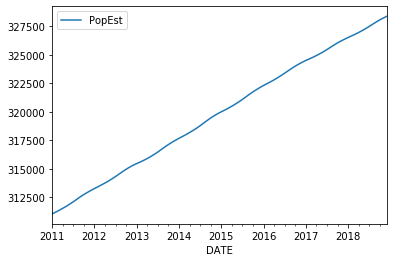

In [126]:
df1.plot()

In [ ]:
train = df1.iloc[:84]
test=df1.iloc[84:]
# fit are order 1
model=AR(train['PopEst'])
AR1fit=model.fit(maxlag=1)
#auto_arima will give result from grid search of many hyperparameter
# if data depands on other variable along with time : You can include exogenous time series, 
# such as the number of employees, in an ARIMA forecast using the xreg argument in forecast::
# Arima or stats::arima. There is lots of guidance on this site if you search xreg or ARIMA with exogenous regressors.


In [4]:
from statsmodels.tsa.ar_model import AR,ARResults
df=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq='MS'
df.head()


,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


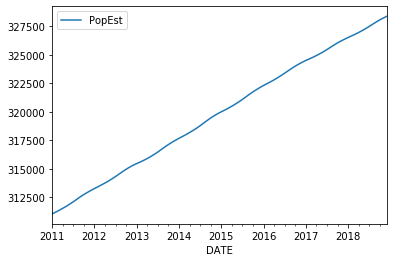

In [6]:
df.plot()

6.410771237031995
const        284.913797
L1.PopEst      0.999686
dtype: float64


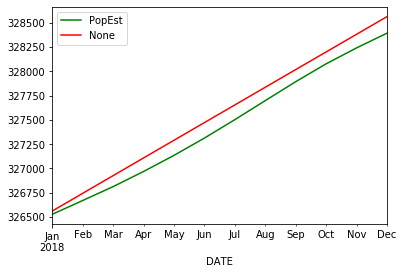

In [23]:
train=df.iloc[:84]
test=df.iloc[84:]
model=AR(train['PopEst'])
# use ar model
AR1fit=model.fit(maxlag=1)
print(AR1fit.aic)
print(AR1fit.params)  # will show parameters of AR models of lag 1
prediction1=AR1fit.predict(start=84,end=95)  # predict from 84 to 96 index
test.plot(legend=True,color='green')
prediction1.plot(legend=True,color='red')


5.079311773556921
const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64


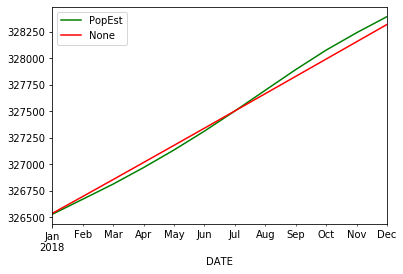

In [24]:
train=df.iloc[:84]
test=df.iloc[84:]
model=AR(train['PopEst'])
# use ar model with  lag 2 to improve aic
AR1fit=model.fit(maxlag=2)
print(AR1fit.aic)
print(AR1fit.params)  # will show parameters of AR models of lag 2
prediction1=AR1fit.predict(start=84,end=95)  # predict from 84 to 96 index
test.plot(legend=True,color='green')
prediction1.plot(legend=True,color='red')


3.5878209954408966
const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64


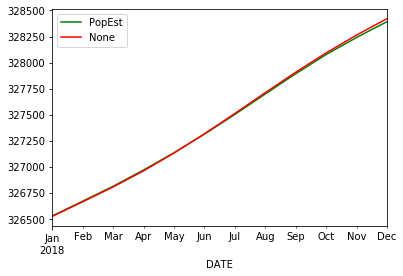

In [26]:
# to get correct order value try different ic value(aic,bic,t-stat etc) from below
# its clear lag 8 is best
AR1fit=model.fit(ic='t-stat')
print(AR1fit.aic)
print(AR1fit.params)  # will show parameters of AR models of lag 2
prediction1=AR1fit.predict(start=84,end=95)  # predict from 84 to 96 index
test.plot(legend=True,color='green')
prediction1.plot(legend=True,color='red')


In [28]:
AR1fit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [ ]:
# dickey-fuller test. If p value <.05 then we say dataset is stationary
# AIC relatively compare many model, also penalize for many parameters
# 



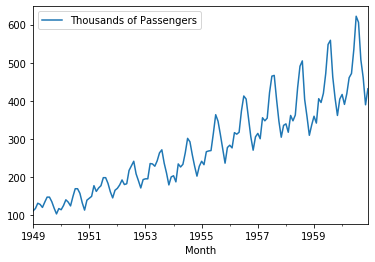

In [30]:
df1=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\airline_passengers.csv',index_col='Month',parse_dates=True)
df2=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq='MS'
df2.index.freq='D'
df1.plot()

In [34]:
# dickey fuller test
from statsmodels.tsa.stattools import adfuller
print(adfuller(df1['Thousands of Passengers']))
help(adfuller)

(0.8153688792060423, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)
Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        data series
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression
    
        * 'c' : constant only (default)
        * 'ct' : constant and trend
        * 'ctt' : constant, and linear and quadratic trend
        * 'nc' : no constant, no trend
    autolag : {'AIC', 'BIC', 't-stat', None}
        * if None,

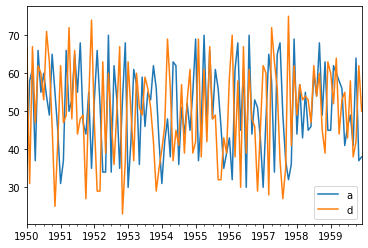

In [35]:
df3=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\samples.csv',index_col=0,parse_dates=True)
df3[['a','d']].plot()

In [38]:
# check causality between a and d
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df3[['a','d']],maxlag=3) # check for max 3 lag more value wil take time



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


{1: ({'ssr_ftest': (1.7051251051681098, 0.1942027811635688, 116.0, 1),
   'ssr_chi2test': (1.7492231682328023, 0.18597442074424264, 1),
   'lrtest': (1.7364915553187075, 0.18758398456227507, 1),
   'params_ftest': (1.7051251051681153, 0.1942027811635669, 116.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (286.03394262556094, 6.025362015680875e-45, 113.0, 2),
   'ssr_chi2test': (597.3806235365697, 1.9074176679053317e-130, 2),
   'lrtest': (212.65135382912, 6.65802208467127e-47, 2),
   'params_ftest': (286.03394262555724, 6.025362015684541e-45, 113.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (188.74462328616224, 3.2288482941468905e-43, 110.0, 3),
   'ssr_chi2test': (602.2669343040268, 3.2505045874690406e-130, 3),
   'lrtest': (212.4788575746153, 8.48066571559607e-46, 3),
   'params_ftest': (188.7446232861622, 3.2288482941469207e-43, 110.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],


In [ ]:
# at lag 3 p value is 0, so causality is there

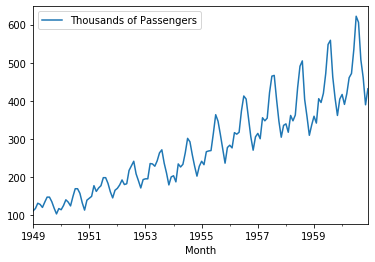

In [39]:
df=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\airline_passengers.csv',index_col='Month',parse_dates=True)
df.plot()

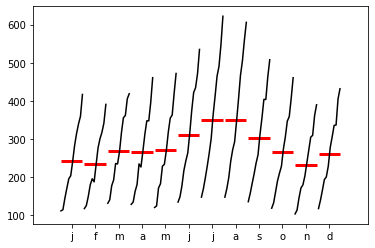

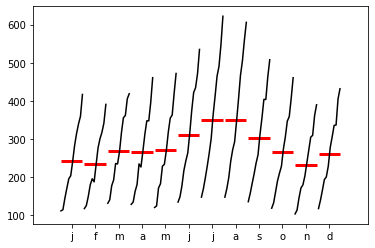

In [42]:
# check seasionalty
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
month_plot(df['Thousands of Passengers'])

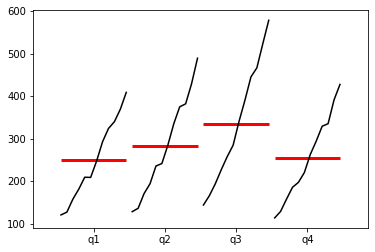

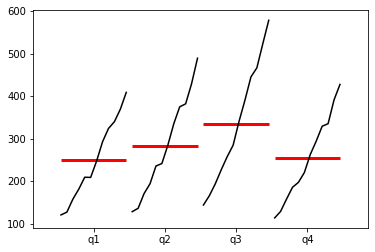

In [43]:
# so in june and july there is peak
dfq=df['Thousands of Passengers'].resample(rule='Q').mean()
quarter_plot(dfq)

#### ARIMA: AR: is regressor of its own lag MA:model that uses dependency between and observation and a residual error from a moving average model applied to lagged observations. SO its a regression of residuals between moving average and real values. I: differences
#### choosing ARIMA orders 
#### theoritacily: by acf,pacf,differencing.AR model identification done by PACF, MA done by ACF 
#### practically: p:no of lag observation,d:no of times raw observations are differenced q: order of moving average . auto_arima can find
#### AIC=2k-2in(L)   : k: no of estimated parameters, L likelihood


In [45]:
from pmdarima import auto_arima
#non stationary data
df1=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq='MS'
#stationary data
df2=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq='D'
stepwisefit = auto_arima(df2['Births'],start_p=0,start_q=0,max_p=6,max_q=3,seasonal=False,trace=True)
stepwisefit.summary()


ModuleNotFoundError: No module named 'pmdarima'

In [46]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
#non stationary data
df2=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'
#stationary data
df1=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq='D'

auto_arima(df1['Births'],seasonal=False).summary()
# this gives us ARMa model as best with order of 2,2
train=df1.iloc[:90]
test=df1.iloc[90:]
model=ARMA(train['Births'],order=(2,2))
results=model.fit()
results.summary()
#predict future data
start=len(train)
end=len(train)+len(test)-1
pred=results.predict(start,end).rename('ARMA (2,2) prediction')
test['Births'].plot()
pred.plot()
# here model just predicted average value, so not a good model with ARMA



ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
# Lets try ARIMA

from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
#non stationary data
df2=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'
#stationary data
df1=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq='D'

auto_arima(df1['Births'],seasonal=False).summary()
# this gives us ARMa model as best with order of 2,2
train=df1.iloc[:90]
test=df1.iloc[90:]
model=ARMA(train['Births'],order=(2,2))
results=model.fit()
results.summary()
#predict future data
start=len(train)
end=len(train)+len(test)-1
pred=results.predict(start,end).rename('ARMA (2,2) prediction')
test['Births'].plot()
pred.plot()
# here model just predicted average value, so not a good model with ARMA



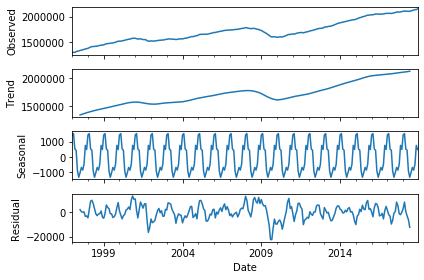

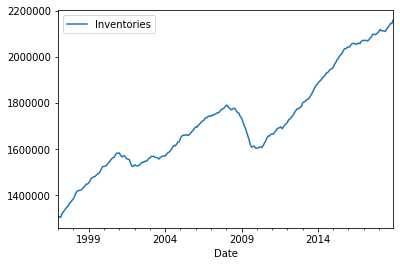

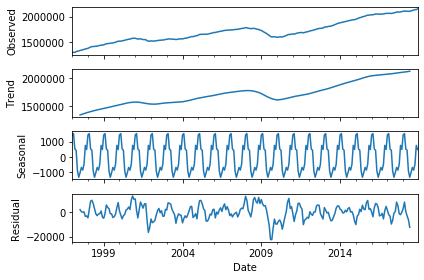

In [49]:
# try with ARIMA
df2=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'

df2.plot()
# check seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df2['Inventories'],model='add')
result.plot()

In [55]:
# here we see a seasonal value but that very less compare to actualvalue so we will ignore seasionality for this case
#auto_arima(df2['Inventories'],seasonal=False)
# this gives aus idea to take d=1, so lets check with d=1 if data become no trend and no seasionality(its ignored) i.e. stationary
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import adfuller 
df2['Diff_1']=diff(df2['Inventories'],k_diff=1)
adf_test(df2['Diff_1'])
# choosing d is easy start with d=1,2,3.. and get difference,
# after each difference run DF test to take d value

# now find p and q component by seeing acf and pacf plot with some rule
plot_acf(df2['Inventories'],lags=40) #
plot_acf(df2['Inventories'],lags=40)
# below will give p,d,q without manual intervention
stepwise=auto_arima(df2['Inventories'])
# as we ignored seasonality the prediction will be little bad


MissingDataError: exog contains inf or nans

## SARIMA seasonal arima model consider seasionality

orig <bound method NDFrame.head of      year  month  decimal_date  average  interpolated
0    1958      3      1958.208   315.71        315.71
1    1958      4      1958.292   317.45        317.45
2    1958      5      1958.375   317.50        317.50
3    1958      6      1958.458      NaN        317.10
4    1958      7      1958.542   315.86        315.86
..    ...    ...           ...      ...           ...
724  2018      7      2018.542   408.71        408.71
725  2018      8      2018.625   406.99        406.99
726  2018      9      2018.708   405.51        405.51
727  2018     10      2018.792   406.00        406.00
728  2018     11      2018.875   408.02        408.02

[729 rows x 5 columns]>
changed             year  month  decimal_date  average  interpolated
date                                                        
1958-03-01  1958      3      1958.208   315.71        315.71
1958-04-01  1958      4      1958.292   317.45        317.45


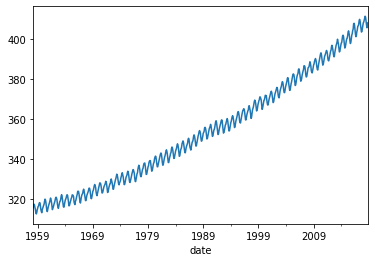

In [64]:
# here we see a seasonal value but that very less compare to actualvalue so we will ignore seasionality for this case
#auto_arima(df2['Inventories'],seasonal=False)
# this gives aus idea to take d=1, so lets check with d=1 if data become no trend and no seasionality(its ignored) i.e. stationary
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.stattools import adfuller 

df=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\co2_mm_mlo.csv')

print('orig',df.head)
# create datetime object
df['date']=pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})
#print(df.info())
df = df.set_index('date')
print('changed',df.head(2))
df.index.freq='MS'
df['interpolated'].plot()

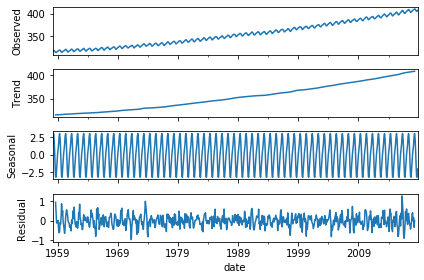

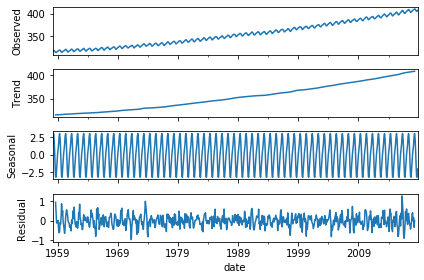

In [62]:
# there are trend and seasonality
result=seasonal_decompose(df['interpolated'],model='add')
result.plot()

In [ ]:
# so there are seasonal and trend so we will run SARIMA
auto_arima(df['interpolated'],seasonal=True,m=12)  # 12 month seasonality as visible from above graph
# it gives sarimax:0,1,1 x(1,0,1,12)
#use this and use on train test and predict
model=sarimax(train['interpolated'],order=(0,1,1),seasonal_order=(1,0,1,12))


#### Exogenous factor consideration


       date   weekday  holiday    holiday_name  rest1  rest2  rest3  rest4  \
0  1/1/2016    Friday        1  New Year's Day   65.0   25.0   67.0  139.0   
1  1/2/2016  Saturday        0              na   24.0   39.0   43.0   85.0   
2  1/3/2016    Sunday        0              na   24.0   31.0   66.0   81.0   
3  1/4/2016    Monday        0              na   23.0   18.0   32.0   32.0   
4  1/5/2016   Tuesday        0              na    2.0   15.0   38.0   43.0   

   total  
0  296.0  
1  191.0  
2  202.0  
3  105.0  
4   98.0  


NameError: name 'auto_arima' is not defined

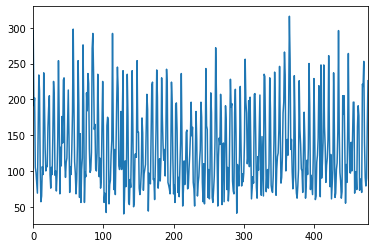

In [68]:
# we can include some other features with time series.
# like along with just count of number we can consider 
# another variable as weekday information

df=pd.read_csv(r'C:\Users\c_MukhopadhyayS.DS-S\Downloads\UDEMY-TSA-FINAL\UDEMY_TSA_FINAL\Data\RestaurantVisitors.csv')
df.index.freq='D'
print(df.head(5))
df=df.dropna()
df['total'].plot()


# so there are seasonal and trend so we will run SARIMA
auto_arima(df['interpolated'],seasonal=True,m=12)  # 12 month seasonality as visible from above graph
# it gives sarimax:0,1,1 x(1,0,1,12)
#use this and use on train test and predict
model=sarimax(train['interpolated'],order=(0,1,1),seasonal_order=(1,0,1,12))
from statsmodels.tsa.seasonal import sesonal_decompose
result=seasonal_decoppose(df['total'])
result.plot()

In [ ]:
# seasonality seems to be weekly
# if we plot pred from simple SARIMA and actual we see in holidays those doesnot match.
# split train test
from pmdarima import auto_arima
auto_arima(df['total'],seasonal=True,m=7).summary()  # weekly seasonal
# below is for exogenous
auto_arima(df['total'],exogenous=df[['holiday']],seasonal=True,m=7).summary()  # weekly seasonal

# this gives sarimax(1,0,0)x(2,0,0,7)
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train['toal'],order=(1,0,0),seasonal_order=(2,0,0,7),
             enforce_invertibility=False)
model_exogenous=SARIMAX(train['total'],exog=train[['holiday']],order=(1,0,1),seasonal_order=(1,0,1,7))
pred=result.predict(start,end,exog=test[['holiday']])

results=model.fit()
# we need to already know future exogenous variable or at leats have very confident estimate
# based on other data, we will only predict y and not exogenous variable



# Vector Auto Regression


In [ ]:
# when we try to predict many variable Y = [y1 y2 y3]
y1(t)=c1+a11.y1(t-1)+si1(t)
y2(t)=c2+a21.y1(t-1)+si2(t)

